# Project on Credit Card Fraud Detection### Give by codsoft during Internship


<img src="https://dataaspirant.com/wp-content/uploads/2020/09/1-Credit-card-fraud-detection-with-classification-algorithms.png" alt="Credit Card Fraud" height="100" width="700"/>

# 🤖 Credit Card Fraud Detection 💳 Machine Learning <a class="anchor"  id="headline">/a>

In this notebook we are going to perform exploratory data analysis and iterate through different machine learning models using [Kaggles Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data) dataset. The objective is to build a model which predicts if a transaction is fraudulent (1) or genuine (0) as accuractely as possible. 

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("D:\Data science\Python_DA\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
# copy original data into another variable for data security and 
# so that you never alter the original data and can easily access the original data if you need to make different changes later on
# data = df.copy()

In [86]:
print(f'Row in this data: {df.shape[0]} and The Columns in our data: {df.shape[1]}')

Row in this data: 284807 and The Columns in our data: 33


In [88]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Minute
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,14.046470,871.785248
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,5.835854,350.824907
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,10.000000,635.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,15.000000,900.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,19.000000,1159.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,23.000000,1439.000000


In [90]:
# our data is already cleaned:
df.info() # no missing values and all features are numarical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
# --- Get basic statistics ---
pd.DataFrame(
    {
        'Data Type': df.dtypes,
        'Missing Count (#)': df.isnull().sum(),
        'Missing Rate (%)': 100 * df.isnull().mean(),  # Its always a rate of missing value or rate of null value
        'Unique Count (#)': df.nunique(),
        'Unique Rate (%)': round(100 * df.nunique() / df.shape[0], 2),
        'Duplicates Count (#)': [df[c].duplicated().sum() for c in df.columns],
        'Duplicates Rate (%)': [round(100 * df[c].duplicated().sum() / df.shape[0], 2) for c in df.columns]
    }
)

,Data Type,Missing Count (#),Missing Rate (%),Unique Count (#),Unique Rate (%),Duplicates Count (#),Duplicates Rate (%)
Time,float64,0,0.0,124592,43.75,160215,56.25
V1,float64,0,0.0,275663,96.79,9144,3.21
V2,float64,0,0.0,275663,96.79,9144,3.21
V3,float64,0,0.0,275663,96.79,9144,3.21
V4,float64,0,0.0,275663,96.79,9144,3.21
V5,float64,0,0.0,275663,96.79,9144,3.21
V6,float64,0,0.0,275663,96.79,9144,3.21
V7,float64,0,0.0,275663,96.79,9144,3.21
V8,float64,0,0.0,275663,96.79,9144,3.21
V9,float64,0,0.0,275663,96.79,9144,3.21


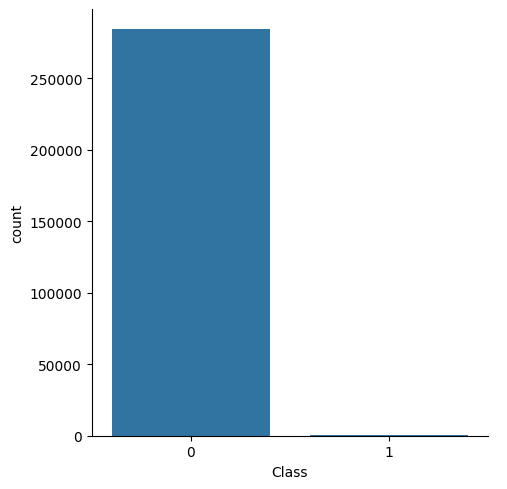

In [25]:
# Here 0:Genuine  and fraudulent (1)
df['Class'].value_counts()
sns.catplot(x="Class",data=df,kind="count")
plt.show() 

In [22]:
print(f"Value count of Class: \n{df['Class'].value_counts()}\n{'**'*15}\nValue count of Class in %: \n{100*df['Class'].value_counts(normalize=True)}")

Value count of Class: 
Class
0    284315
1       492
Name: count, dtype: int64
******************************
Value count of Class in %: 
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [28]:
100*df['Class'].value_counts(normalize=True)

overall_fraud_count = df['Class'].sum()
overall_fraud_rate = overall_fraud_count / df['Class'].shape[0]
non_fraud_count = df['Class'].shape[0] - overall_fraud_count
overall_non_fraud_rate = non_fraud_count / df['Class'].shape[0]

pd.DataFrame({
    'Metric': ['Number of Genuine', 'Number of Fraud', 'Genuine Rate (%)', 'Fraud Rate (%)'],
    'Value': [non_fraud_count, overall_fraud_count, 100*overall_non_fraud_rate, 100*overall_fraud_rate]
})

,Metric,Value
0,Number of Genuine,284315.000000
1,Number of Fraud,492.000000
2,Genuine Rate (%),99.827251
3,Fraud Rate (%),0.172749


<Axes: >

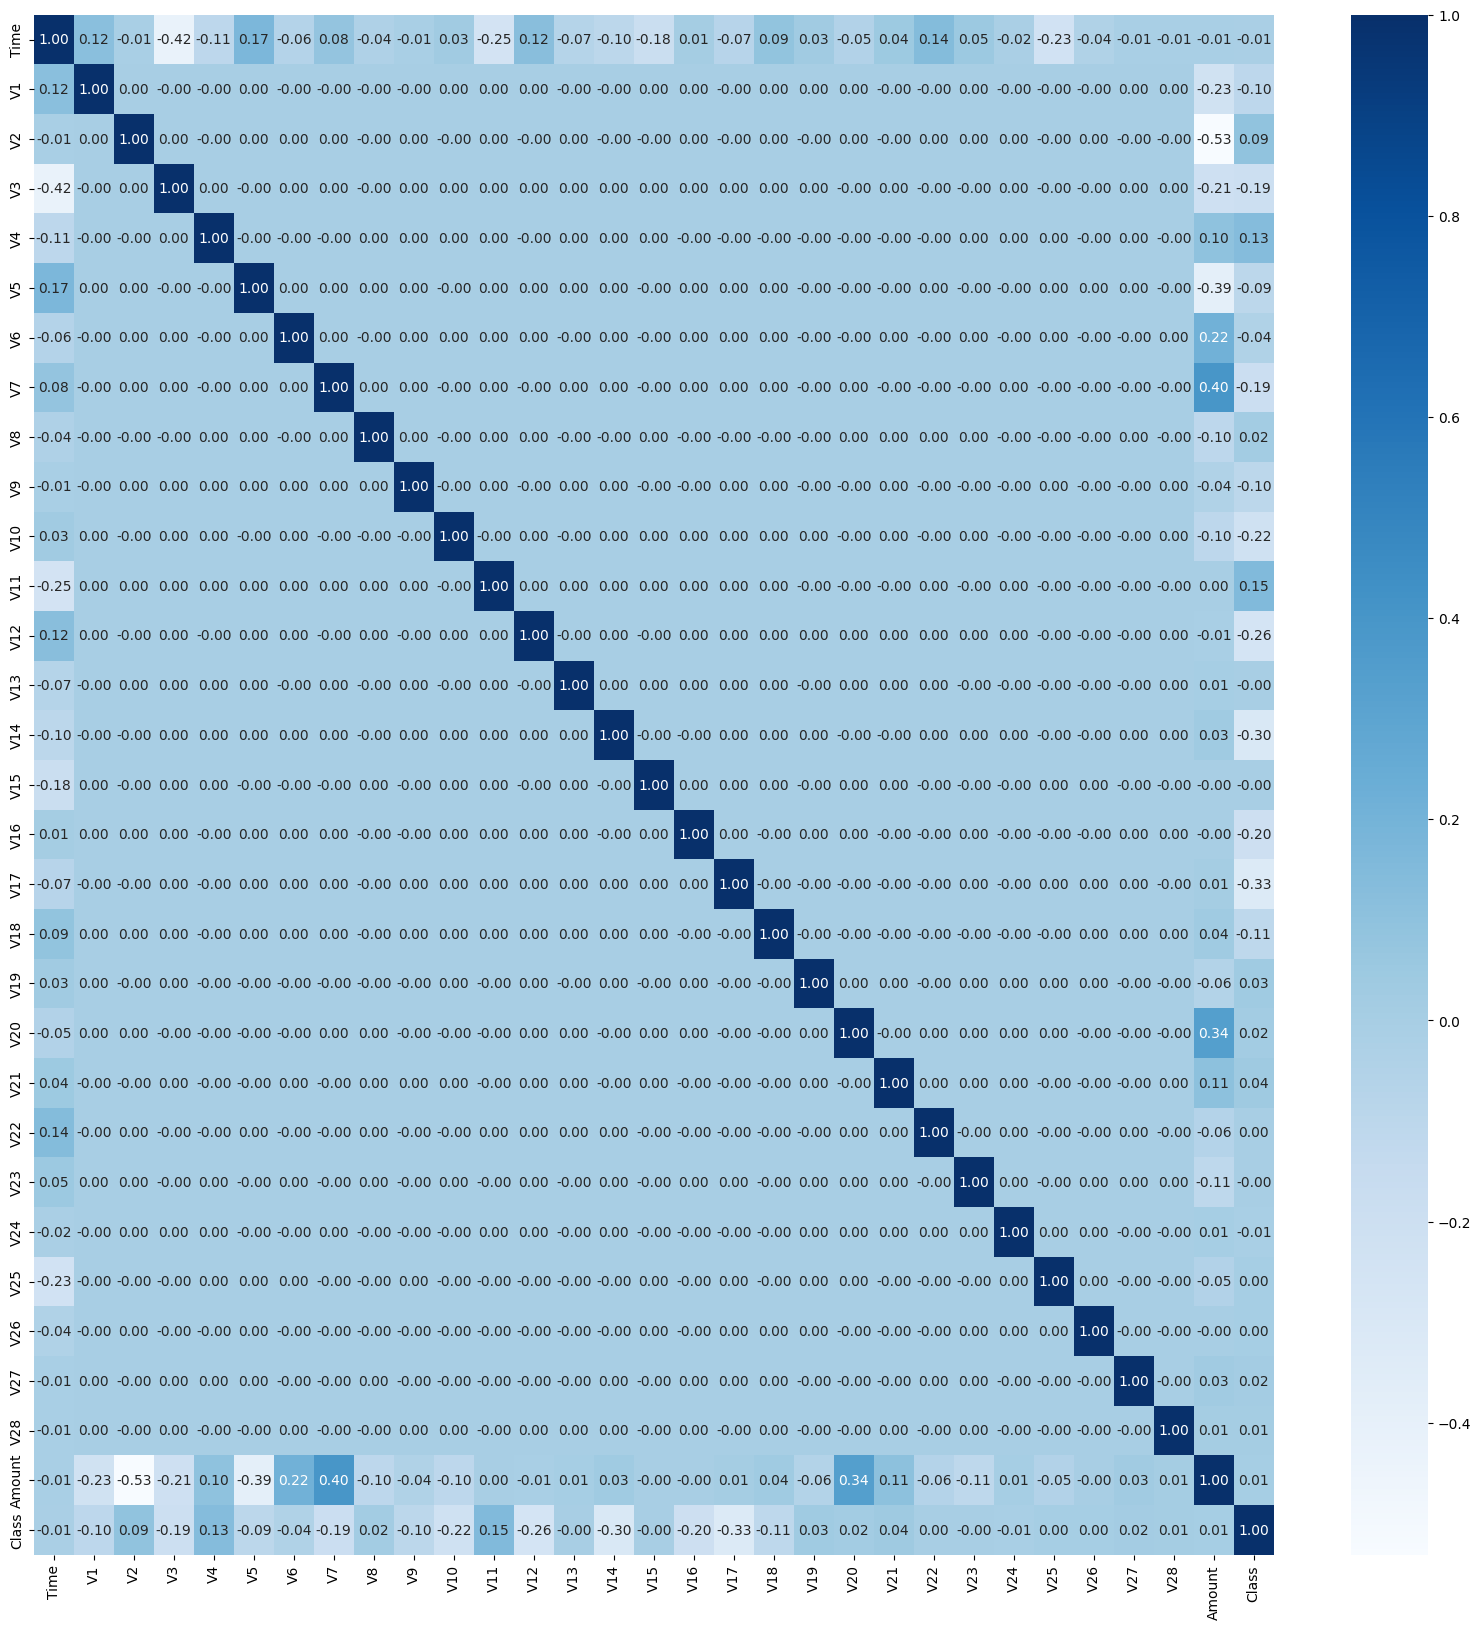

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt="0.02f",cmap="Blues")

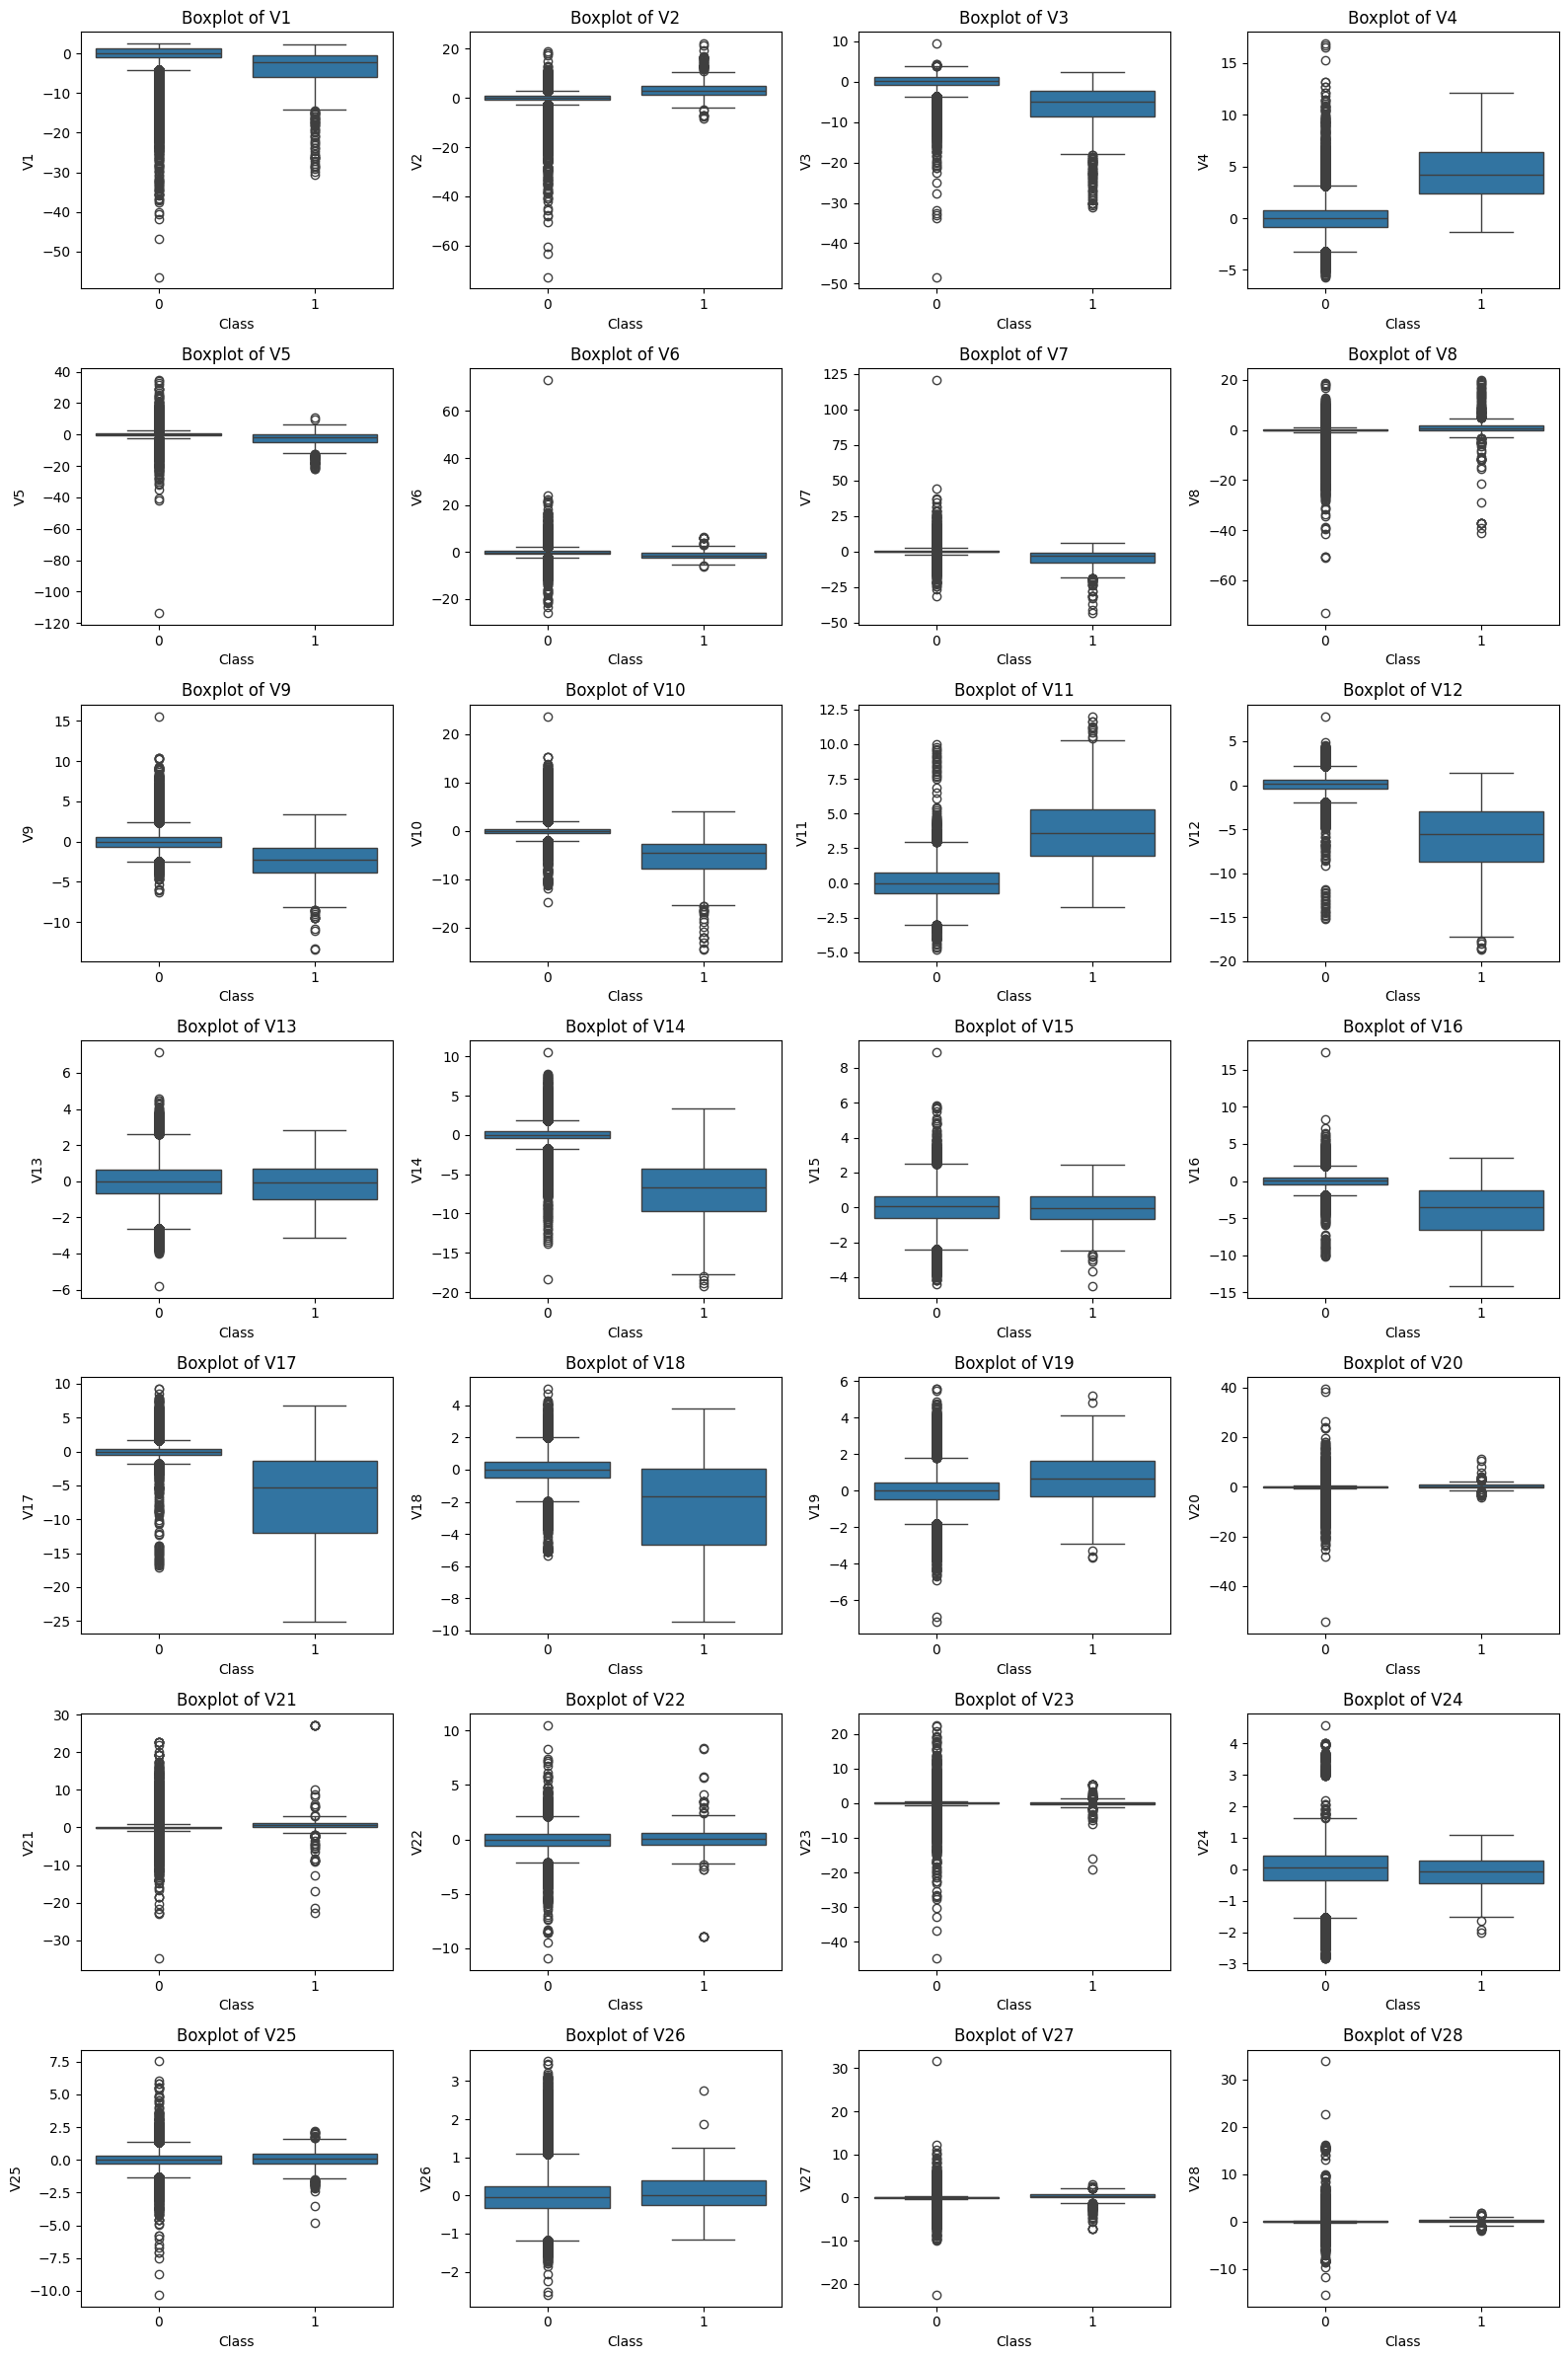

In [31]:
# Boxplots for V1 to V28
plt.figure(figsize=(16, 24))
for i, col in enumerate(df.columns[1:29]):
    plt.subplot(7, 4, i+1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

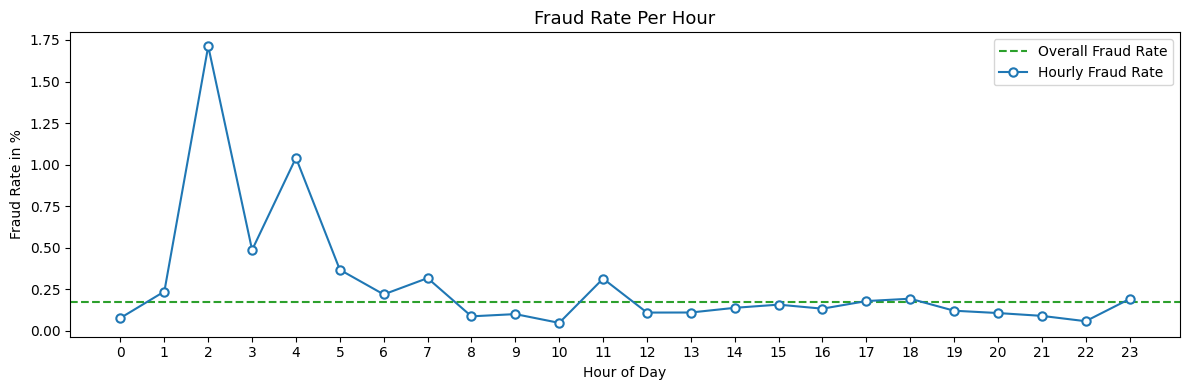

In [34]:
# --------- #
# Preparing #
# --------- #

df['Hour'] = df['Time'] // 3_600 % 24
hourly_fraud_rate = df.groupby('Hour')['Class'].mean().reset_index()
overall_fraud_rate = df['Class'].mean() * 100
hourly_fraud_rate['Class'] *= 100


# -------- #
# Plotting #
# -------- #

plt.figure(figsize=(12, 4))
plt.axhline(y=overall_fraud_rate, color='C2', linestyle='--', label='Overall Fraud Rate')
plt.plot(hourly_fraud_rate['Hour'], hourly_fraud_rate['Class'], 
         linestyle='-', marker='o', markerfacecolor='white', markeredgewidth=1.5, color='C0', label='Hourly Fraud Rate')
plt.title('Fraud Rate Per Hour', fontsize=13)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate in %')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

__Observations__

- The dataset consists of roughly 24 hours of data.
- In the 2nd hour after the first transaction the fraud fraud is the highest, having a value of nearly 1.75%. 
- The hourly fraud rates stabilizes after the 8th hour.

__Insights__

> Most fraud happened in the early morning between 2am and 4am.

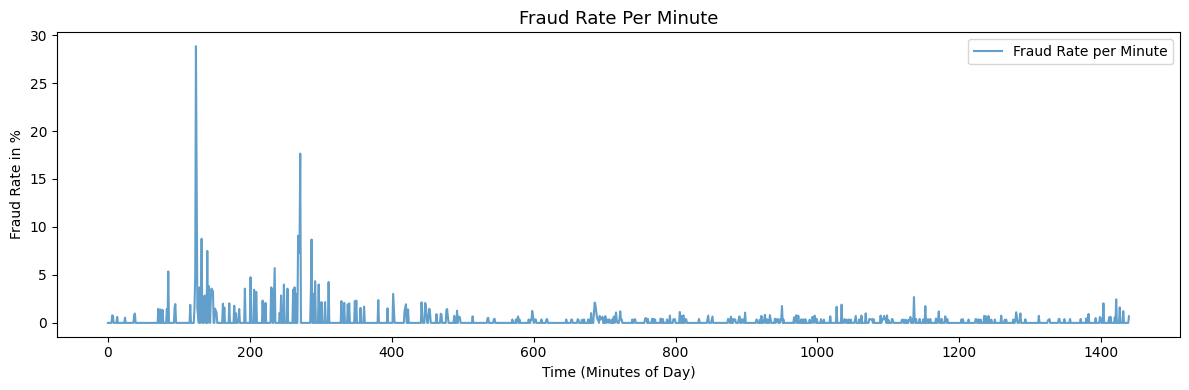

In [37]:
# --------- #
# Preparing #
# --------- #

df['Minute'] = (df['Time'] // 60) % 1440
minute_fraud_rate = df.groupby('Minute')['Class'].mean().reset_index()
minute_fraud_rate['Class'] *= 100


# -------- #
# Plotting #
# -------- #

plt.figure(figsize=(12, 4))

plt.plot(minute_fraud_rate['Minute'], minute_fraud_rate['Class'], linestyle='-', color='C0', 
         label='Fraud Rate per Minute', alpha=0.7)
plt.title('Fraud Rate Per Minute', fontsize=13)
plt.xlabel('Time (Minutes of Day)')
plt.ylabel('Fraud Rate in %')
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()

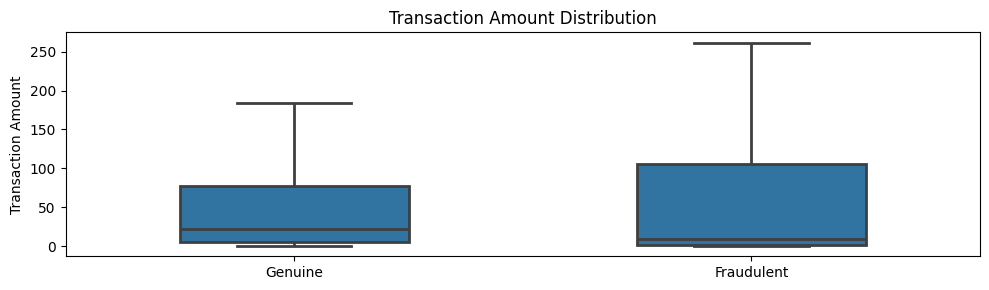

In [39]:
fig, axes = plt.subplots(figsize=(10, 3))

sns.boxplot(data=df, x=df['Class'], y=df['Amount'],
            linewidth=2, width=0.5, showfliers=False, ax=axes)
axes.set_title('Transaction Amount Distribution')
axes.set_xlabel('')
axes.set_ylabel('Transaction Amount')
axes.set_xticklabels(['Genuine', 'Fraudulent'])

plt.tight_layout()
plt.show()

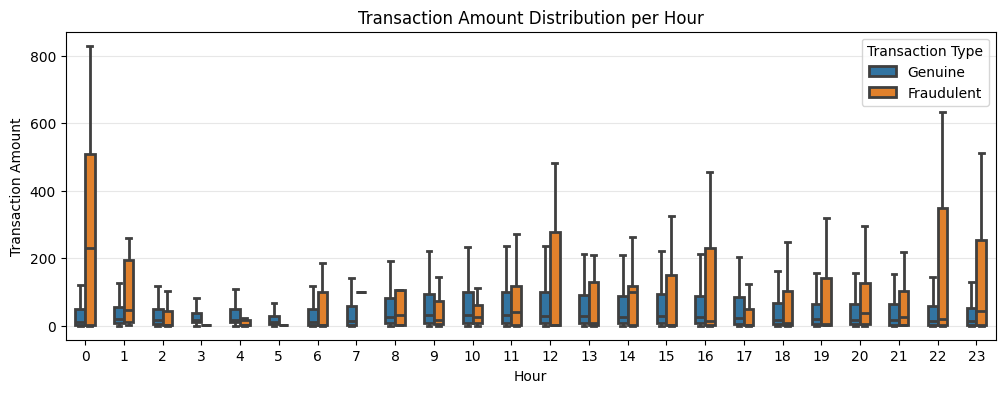

In [41]:
plt.figure(figsize=(12, 4))

sns.boxplot(data=df, x='Hour', y=df["Amount"], hue=df["Class"], linewidth=2, width=0.5, showfliers=False)
plt.title('Transaction Amount Distribution per Hour')
plt.xlabel('Hour')
plt.ylabel('Transaction Amount')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Genuine' if label == '0' else 'Fraudulent' for label in labels]
plt.legend(handles, labels, title='Transaction Type')

plt.xticks(ticks=plt.xticks()[0], labels=[int(x) for x in plt.xticks()[0]])
plt.grid(True, axis='y', alpha=0.3)

plt.show()

In [ ]:
df.head(3)

# Train and Test splitting 
-

In [45]:
# copying data such that original is not affected and selecting columns that are relevent
data = df.copy(deep= True)

In [47]:
# dropping duplicate records
data.drop_duplicates(keep='first', inplace = True)

In [49]:
# since amount column has high standard deviation we need to preprocess it using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [51]:
# dropping time column as there is no relevance of transaction time with fraud detection
data.drop(columns= ['Time','Hour','Minute'], inplace= True)

In [53]:
# splitting data into dependent and independent
X = data.drop(columns='Class',axis = 1)
Y = data['Class']

In [155]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

In [57]:
# Split dataset in TRAIN and TEST #
# ------------------------------- #
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [151]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train: ",Y_train.shape)
print("X_test: ",X_test.shape)

X_train:  (226980, 29)
X_test:  (56746, 29)
Y_train:  (226980,)
X_test:  (56746, 29)


## Accuracy through Random Forest Classifier()
---

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train,Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [67]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, y_pred))
Random_accuracy = accuracy_score(Y_test, y_pred)

Confusion Matrix:
 [[56654     2]
 [   24    66]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Accuracy Score: 0.9995418179254926


## Accuracy through Logestic Regression()
---

In [ ]:
lr = LogisticRegression( random_state=42)
# fit it to complete undersampled data
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, y_pred))
Logestic_Accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
Accuracy_compare= {"Logestic Regression: ":Random_accuracy),
                  "Random Forest: ": Logestic_Accuracy}


---

💚 Thank you for reading 💚

If you have any questions or feedback, feel free to leave a comment 🤔

Please __UPVOTE__ if you enjoyed this notebook 🙏

---